In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from category_encoders import LeaveOneOutEncoder

In [2]:
df = pd.read_csv("food_ingredients_and_allergens.csv", keep_default_na = False, na_values = [""])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Food Product                399 non-null    object 
 1   Main Ingredient             399 non-null    object 
 2   Sweetener                   399 non-null    object 
 3   Fat/Oil                     399 non-null    object 
 4   Seasoning                   399 non-null    object 
 5   Allergens                   399 non-null    object 
 6   Price ($)                   399 non-null    float64
 7   Customer rating (Out of 5)  399 non-null    float64
 8   Prediction                  398 non-null    object 
dtypes: float64(2), object(7)
memory usage: 28.2+ KB


In [4]:
df.describe()

,Price ($),Customer rating (Out of 5)
count,399.000000,399.000000
mean,12.402356,2.991228
std,4.368315,1.171049
min,5.070000,1.000000
25%,8.650000,1.900000
50%,12.470000,3.100000
75%,16.105000,4.000000
max,19.930000,5.000000


In [5]:
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",17.48,4.7,Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,Contains


In [6]:
df.shape

(399, 9)

In [7]:
for item in list(df.columns):
    print(item, "\t" , df[item].nunique())

Food Product 	 259
Main Ingredient 	 101
Sweetener 	 10
Fat/Oil 	 36
Seasoning 	 186
Allergens 	 40
Price ($) 	 345
Customer rating (Out of 5) 	 41
Prediction 	 2


In [8]:
Allergen = dict()
for i in df["Allergens"]:
    i = i.split(", ")
    for j in i:
        if j != "None":
            if j not in Allergen:
                Allergen[j] = 0
            else:
                Allergen[j] += 1

In [9]:
Allergen

{'Almonds': 1,
 'Wheat': 95,
 'Dairy': 189,
 'Chicken': 1,
 'Celery': 1,
 'Anchovies': 0,
 'Cocoa': 2,
 'Eggs': 12,
 'Fish': 19,
 'Ghee': 0,
 'Nuts': 4,
 'Mustard': 0,
 'Soybeans': 16,
 'Coconut': 0,
 'Milk': 5,
 'Strawberries': 1,
 'Oats': 0,
 'Peanuts': 4,
 'Pine nuts': 2,
 'Rice': 0,
 'Shellfish': 15,
 'Pork': 1,
 'Alcohol': 0}

In [10]:
df = df.rename(columns= {'Customer rating (Out of 5)' : 'Customer rating',
                         'Prediction' : 'Is_Allergen'})

In [11]:
categorical = ['Food Product','Main Ingredient','Sweetener','Fat/Oil','Seasoning','Allergens']
numerical = ['Price ($)','Customer rating','Is_Allergen']

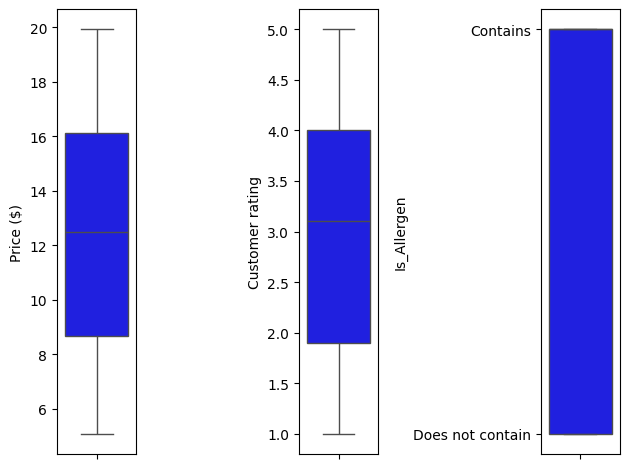

In [12]:
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y=df[numerical[i]], color='blue')
    plt.tight_layout()

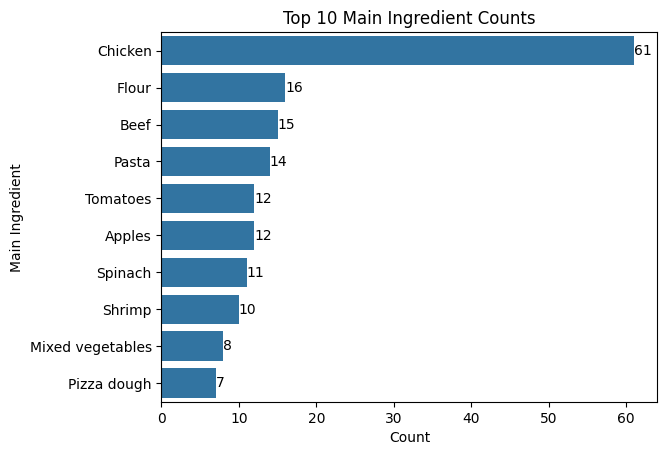

In [13]:
ax = sns.countplot(y=df['Main Ingredient'],orient='v', order=df['Main Ingredient'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Main Ingredient Counts')
plt.show()

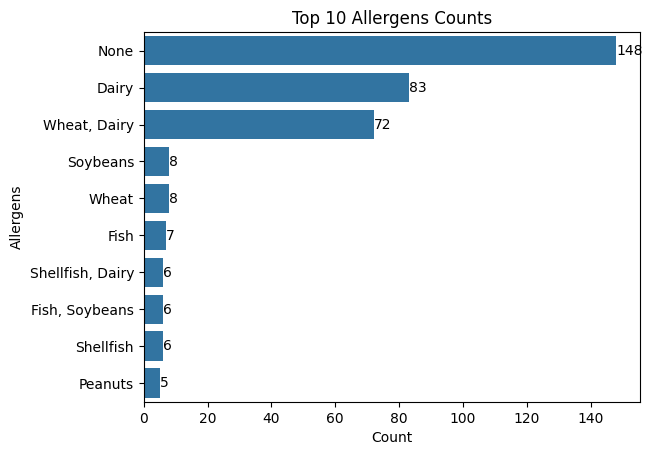

In [14]:
ax = sns.countplot(y=df['Allergens'],orient='v', order=df['Allergens'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Allergens Counts')
plt.show()

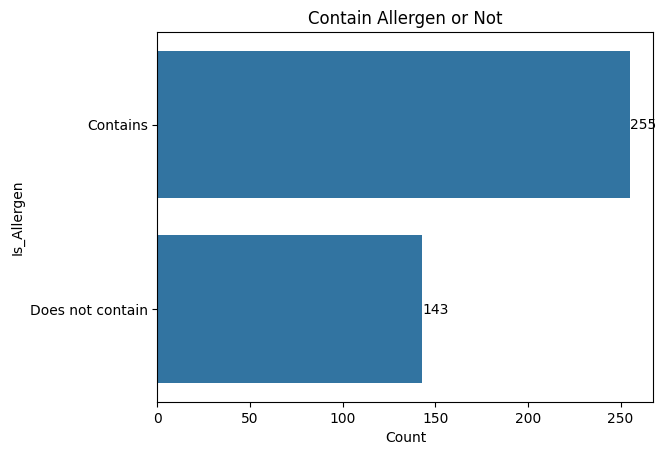

In [15]:
ax = sns.countplot(y=df['Is_Allergen'],orient='v', order=df["Is_Allergen"].value_counts(sort=True).iloc[:2].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Contain Allergen or Not')
plt.show()

In [16]:
import plotly.express as px
import plotly.graph_objects as go

In [17]:
df.columns

Index(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning',
       'Allergens', 'Price ($)', 'Customer rating', 'Is_Allergen'],
      dtype='object')

In [18]:
##Preprocessing on Dataset

In [19]:
df.isnull().sum()

Food Product       0
Main Ingredient    0
Sweetener          0
Fat/Oil            0
Seasoning          0
Allergens          0
Price ($)          0
Customer rating    0
Is_Allergen        1
dtype: int64

In [20]:
df.dropna(axis = 0, inplace = True)

In [21]:
# Identify duplicate rows in the entire dataset
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [Food Product, Main Ingredient, Sweetener, Fat/Oil, Seasoning, Allergens, Price ($), Customer rating, Is_Allergen]
Index: []


In [22]:
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating,Is_Allergen
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",17.48,4.7,Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,Contains


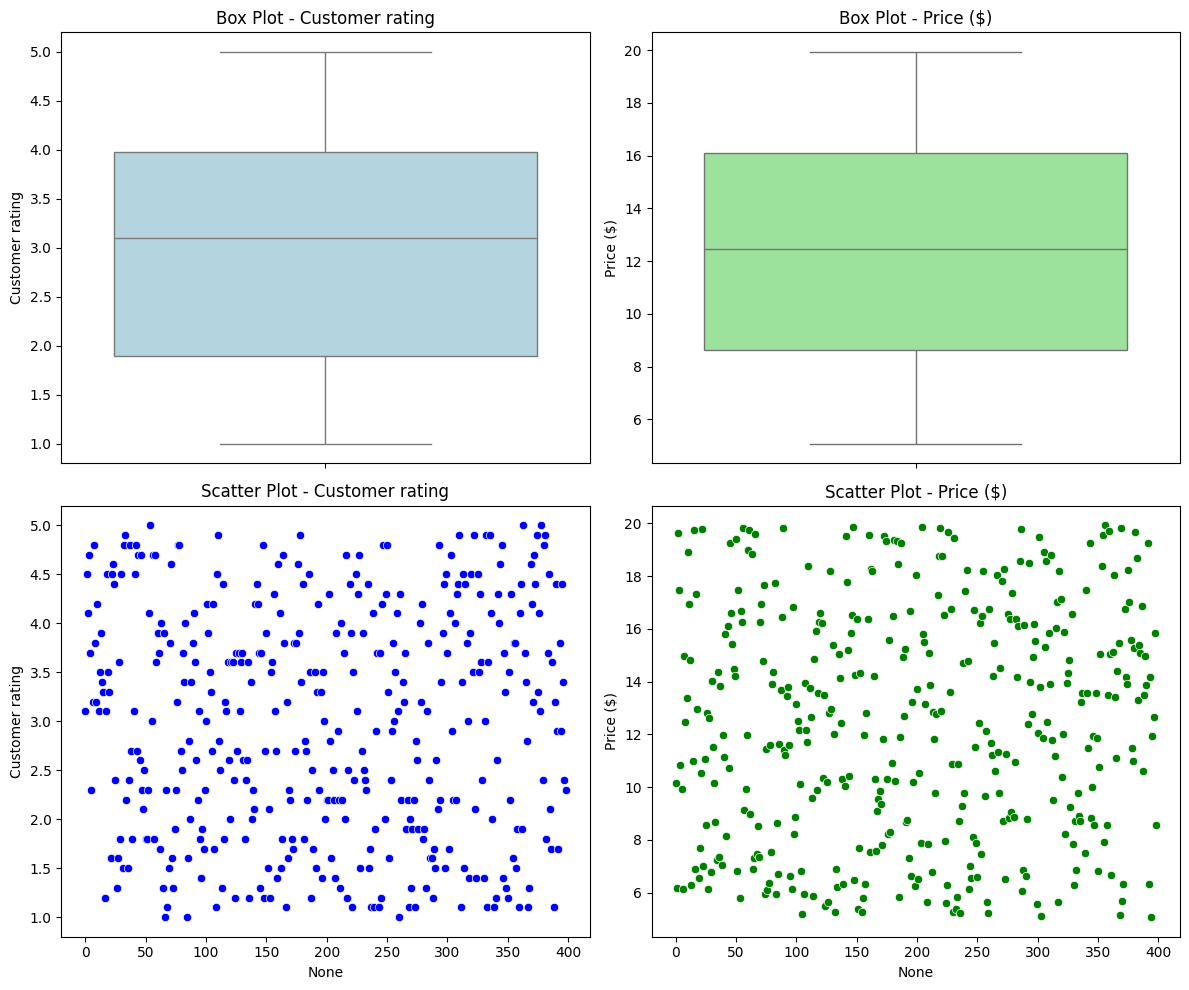

In [23]:
# Visualize Outliers using Box plot and Scatter plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Box plot for 'Income'
sns.boxplot(data=df['Customer rating'], ax=axes[0, 0], color='lightblue')
axes[0, 0].set_title('Box Plot - Customer rating')

# Box plot for 'PurchaseAmount'
sns.boxplot(data=df['Price ($)'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Box Plot - Price ($)')

# Scatter plot for 'Income'
sns.scatterplot(x=df.index, y=df['Customer rating'], ax=axes[1, 0], color='blue')
axes[1, 0].set_title('Scatter Plot - Customer rating')

# Scatter plot for 'PurchaseAmount'
sns.scatterplot(x=df.index, y=df['Price ($)'], ax=axes[1, 1], color='green')
axes[1, 1].set_title('Scatter Plot - Price ($)')

plt.tight_layout()
plt.show()

In [24]:
## Label Encoding 

In [25]:
#Label Encoding for Is_Allergen
label_encoder = LabelEncoder()
df['Is_Allergen'] = label_encoder.fit_transform(df['Is_Allergen'])

In [26]:
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating,Is_Allergen
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,0
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,0
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,0
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",17.48,4.7,0
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,0


In [27]:
## Leave one out Encoding 

In [28]:
categorical_columns = df.select_dtypes(include=['object']).columns

loo_encoder = LeaveOneOutEncoder(cols = categorical_columns)
df_encoded = loo_encoder.fit_transform(df[categorical_columns], df['Price ($)'])

df = pd.concat([df.drop(categorical_columns, axis = 1), df_encoded], axis=1)

In [29]:
df

,Price ($),Customer rating,Is_Allergen,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens
0,10.15,3.1,0,6.170000,6.170000,12.343736,12.471786,13.408000,6.170000
1,6.17,4.5,0,10.150000,10.150000,12.387473,12.519167,13.806000,10.150000
2,19.65,4.1,0,12.500000,17.480000,12.371511,12.031228,11.584000,17.480000
3,17.48,4.7,0,13.223333,19.650000,12.379317,12.069298,11.801000,19.650000
4,10.83,3.7,0,12.397588,17.925000,12.403237,12.185965,12.466000,12.072073
...,...,...,...,...,...,...,...,...,...
394,5.07,2.9,0,11.980000,12.120000,12.399560,12.532262,14.180000,14.180000
395,11.95,4.4,0,12.397588,12.397588,12.323956,12.450357,12.397588,14.250000
396,12.67,3.4,0,11.800000,12.796667,12.316044,12.441786,15.830000,13.890000
397,15.83,2.4,0,16.560000,14.556667,12.281319,12.404167,12.670000,12.310000


In [30]:
with open('../Model/leave_one_out_encoder.pkl', 'wb') as file:
    pickle.dump(loo_encoder, file)

In [31]:
## SAVING PROCESSED DATASET


df.to_csv('../Dataset/preprocessed_data.csv', index=False)